Abstract:

YouTube (the world-famous video sharing website) maintains a list of the top trending
videos on the platform. According to Variety magazine, to determine the year's top-trending videos, YouTube uses a combination of factors including measuring users
interactions (number of views, shares, comments and likes)



Problem Statement:

Read the youtube data and perform exploratory data analysis.

Import necessary libraries

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

Load the data set and store it in a Variable

In [76]:
train=pd.read_csv('E:/Study materials/Imarticus/python/python project1/10-Project/Dataset/train.csv')

In [77]:
train.head(2)

,Video_id,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Unnamed: 17,Unnamed: 18
0,HDR9SQc79,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6.0,21,6,,FALSE,FALSE,13342,6089,False,1978978,NaN,NaN
1,KNH52UF?48,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1.0,23,1,116266,TRUE,FALSE,5761,3044,False,1487870,NaN,NaN


Checking the shape

In [171]:
train.shape

(2579, 16)

checking the Data types of each column

In [169]:
train.dtypes

Video_id                 object
category_id               int32
subscriber                int32
title                    object
tags                     object
description              object
Trend_day_count           int32
Tag_count                 int32
Trend_tag_count           int32
comment_count             int32
comment_disabled         object
like dislike disabled    object
likes                     int32
dislike                   int32
tag appered in title     object
views                     int32
dtype: object

Describing the structure fo getting mean, median, mode, etc.,

In [98]:
train.describe()

,category_id,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views
count,3198.000000,3.198000e+03,3198.00000,3198.000000,3198.000000,3198.000000,3.198000e+03,3198.000000,3.198000e+03
mean,20.367104,3.823981e+06,7.96404,18.620388,7.119762,164470.538462,9.766148e+03,5784.686054,1.571851e+06
std,7.328586,2.855444e+07,78.54377,80.354184,175.056764,67013.429359,2.240330e+04,4859.994228,2.053532e+07
min,1.000000,0.000000e+00,0.00000,0.000000,1.000000,10.000000,0.000000e+00,0.000000,1.000000e+00
25%,17.000000,2.428800e+05,4.00000,12.000000,2.000000,126760.750000,0.000000e+00,0.000000,4.306332e+05
50%,24.000000,1.281938e+06,7.00000,17.000000,4.000000,163785.000000,1.022150e+04,5360.000000,7.081770e+05
75%,25.000000,3.823980e+06,10.00000,21.000000,6.000000,203208.250000,1.505300e+04,10040.250000,1.204446e+06
max,43.000000,1.576229e+09,4444.00000,3225.000000,9903.000000,299877.000000,1.213628e+06,14858.000000,9.898735e+08


Counting the null values in the Data set

In [79]:
train.isna().sum()

Video_id                    0
category_id                 6
channel_title               3
subscriber                 23
title                       3
tags                      152
description                65
Trend_day_count             1
Tag_count                   1
Trend_tag_count             1
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
Unnamed: 17              3197
Unnamed: 18              3197
dtype: int64

Dropping the unwanted columns


In [80]:
train.drop(['Unnamed: 17','Unnamed: 18'],axis=1,inplace=True)

In [ ]:
train.drop(['channel_title'],axis=1,inplace=True)

Checking for duplicated values

In [82]:
train.duplicated().sum()

0

Hence there is no duplicates in our data, we are leaving as it is. Else we have to drop those duplicates.

There are some variables they are in object data type, which are to be in numeric formats, hence we are converting it to numeric format.

In [85]:
train['category_id']=pd.to_numeric(train['category_id'],errors='coerce')
train['Tag_count']=pd.to_numeric(train['Tag_count'],errors='coerce')
train['Trend_tag_count']=pd.to_numeric(train['Trend_tag_count'],errors='coerce')
train['comment_count']=pd.to_numeric(train['comment_count'],errors='coerce')
train['likes']=pd.to_numeric(train['likes'],errors='coerce')
train['dislike']=pd.to_numeric(train['dislike'],errors='coerce')
train['views']=pd.to_numeric(train['views'],errors='coerce')

In [86]:
train.dtypes

Video_id                  object
category_id              float64
subscriber               float64
title                     object
tags                      object
description               object
Trend_day_count          float64
Tag_count                float64
Trend_tag_count          float64
comment_count            float64
comment_disabled          object
like dislike disabled     object
likes                    float64
dislike                  float64
tag appered in title      object
views                    float64
dtype: object

imputing null values with their mean, median and mode.

In [89]:
train['category_id'].replace(np.nan,train['category_id'].median(),inplace=True)
train['subscriber'].replace(np.nan,train['subscriber'].mean(),inplace=True)
train['title'].replace(np.nan,train['title'].mode()[0],inplace=True)
train['tags'].replace(np.nan,train['tags'].mode()[0],inplace=True)
train['description'].replace(np.nan,train['description'].mode()[0],inplace=True)
train['Trend_day_count'].replace(np.nan,train['Trend_day_count'].mean(),inplace=True)
train['Tag_count'].replace(np.nan,train['Tag_count'].mean(),inplace=True)
train['Trend_tag_count'].replace(np.nan,train['Trend_tag_count'].mean(),inplace=True)
train['comment_count'].replace(np.nan,train['comment_count'].median(),inplace=True)
train['likes'].replace(np.nan,train['likes'].mean(),inplace=True)
train['dislike'].replace(np.nan,train['dislike'].mean(),inplace=True)
train['tag appered in title'].replace(np.nan,train['tag appered in title'].mean(),inplace=True)
train['views'].replace(np.nan,train['views'].median(),inplace=True)

In [90]:
train.isna().sum()

Video_id                 0
category_id              0
subscriber               0
title                    0
tags                     0
description              0
Trend_day_count          0
Tag_count                0
Trend_tag_count          0
comment_count            0
comment_disabled         0
like dislike disabled    0
likes                    0
dislike                  0
tag appered in title     0
views                    0
dtype: int64

we can see that there are no null values seen in our data set.

Hence we cant convert directly from object datatype to int we first converted it to float and now converting it to integer dtype.

In [94]:
train['category_id'] = train['category_id'].astype('int')
train['subscriber'] = train['subscriber'].astype('int')
train['Trend_day_count'] = train['Trend_day_count'].astype('int')
train['Tag_count'] = train['Tag_count'].astype('int')
train['Trend_tag_count'] = train['Trend_tag_count'].astype('int')
train['comment_count'] = train['comment_count'].astype('int')
train['likes'] = train['likes'].astype('int')
train['dislike'] = train['dislike'].astype('int')
train['views'] = train['views'].astype('int')

We can now see that the data types of the variables are perfect depending upon the values

In [95]:
train.dtypes

Video_id                 object
category_id               int32
subscriber                int32
title                    object
tags                     object
description              object
Trend_day_count           int32
Tag_count                 int32
Trend_tag_count           int32
comment_count             int32
comment_disabled         object
like dislike disabled    object
likes                     int32
dislike                   int32
tag appered in title     object
views                     int32
dtype: object

plottings

<AxesSubplot:>

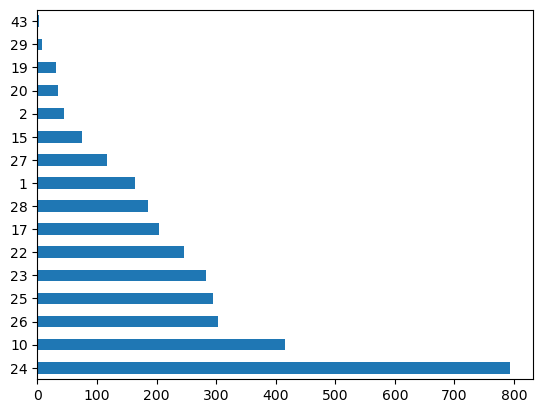

In [102]:
train['category_id'].value_counts().plot(kind='barh')

The category id '24' is having the highest video uploaded

checking for outliers in each variables

<AxesSubplot:>

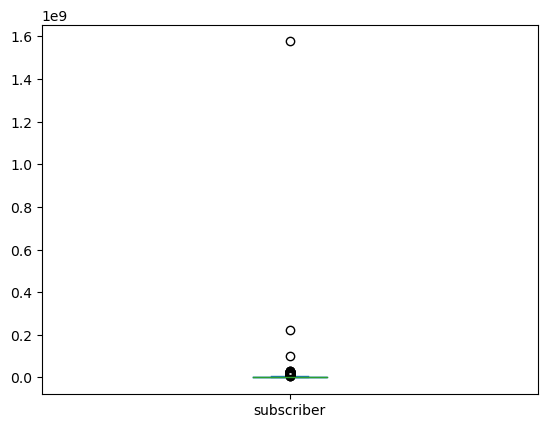

In [112]:
train['subscriber'].plot(kind='box')

<AxesSubplot:>

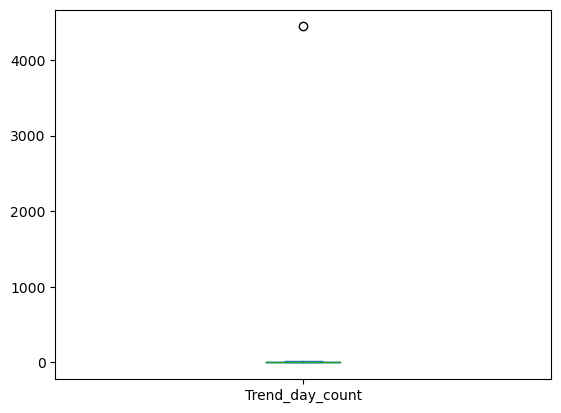

In [113]:
train['Trend_day_count'].plot(kind='box')

<AxesSubplot:>

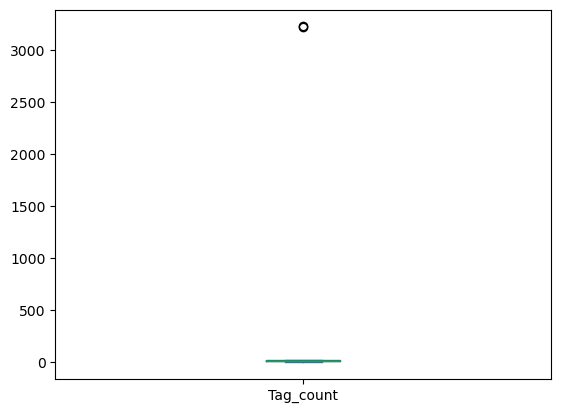

In [114]:
train['Tag_count'].plot(kind='box')

<AxesSubplot:>

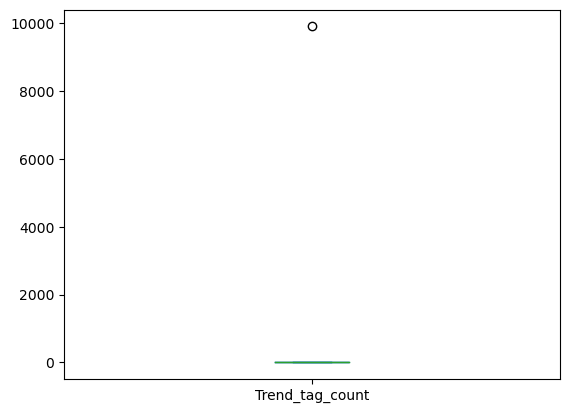

In [115]:
train['Trend_tag_count'].plot(kind='box')

<AxesSubplot:>

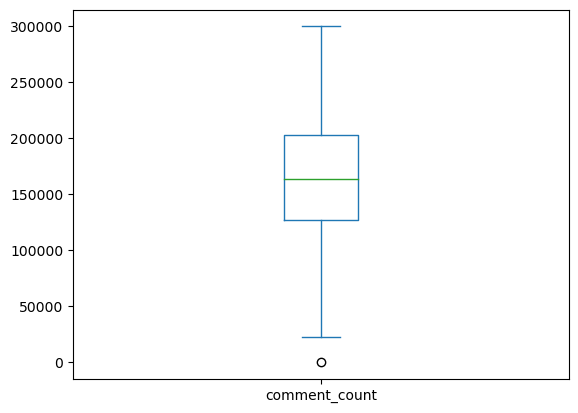

In [116]:
train['comment_count'].plot(kind='box')

<AxesSubplot:>

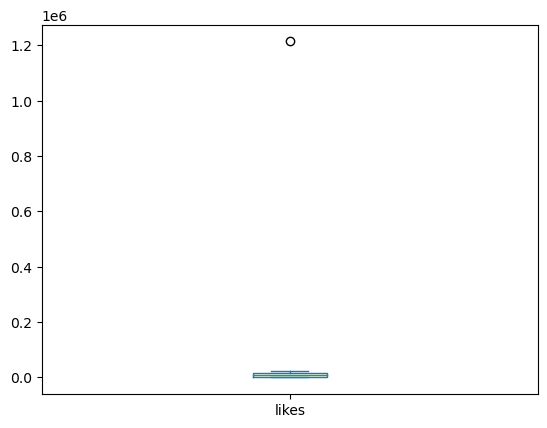

In [117]:
train['likes'].plot(kind='box')

<AxesSubplot:>

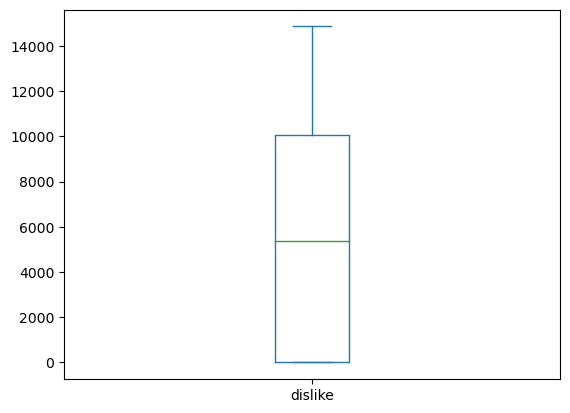

In [118]:
train['dislike'].plot(kind='box')

<AxesSubplot:>

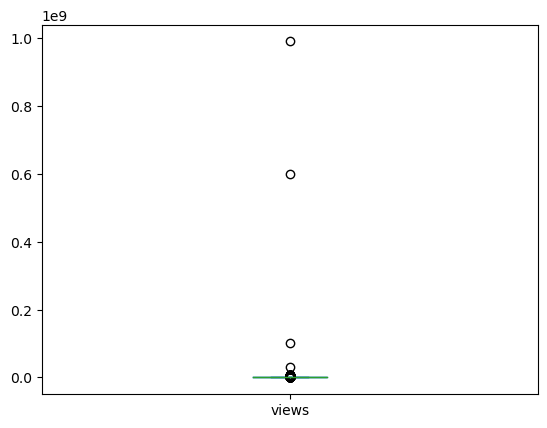

In [119]:
train['views'].plot(kind='box')

Defining a function for removing outlier because it will be easy for removing outliers from many variables as we can call the function easily

In [99]:
def rem_outliers(col):
    sorted(col)
    q1,q3=col.quantile([0.25,0.75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range, upper_range

In [138]:
low_lmt,up_lmt=rem_outliers(train['subscriber'])
train=train[(train.subscriber>low_lmt) & (train.subscriber<up_lmt)]

In [122]:
low_lmt,up_lmt=rem_outliers(train['Trend_day_count'])
train=train[(train.Trend_day_count>low_lmt) & (train.Trend_day_count<up_lmt)]

In [123]:
low_lmt,up_lmt=rem_outliers(train['Tag_count'])
train=train[(train.Tag_count>low_lmt) & (train.Tag_count<up_lmt)]

In [124]:
low_lmt,up_lmt=rem_outliers(train['Trend_tag_count'])
train=train[(train.Trend_tag_count>low_lmt) & (train.Trend_tag_count<up_lmt)]

In [126]:
low_lmt,up_lmt=rem_outliers(train['comment_count'])
train=train[(train.comment_count>low_lmt) & (train.comment_count<up_lmt)]

In [125]:
low_lmt,up_lmt=rem_outliers(train['likes'])
train=train[(train.likes>low_lmt) & (train.likes<up_lmt)]

In [127]:
low_lmt,up_lmt=rem_outliers(train['dislike'])
train=train[(train.dislike>low_lmt) & (train.dislike<up_lmt)]

<AxesSubplot:>

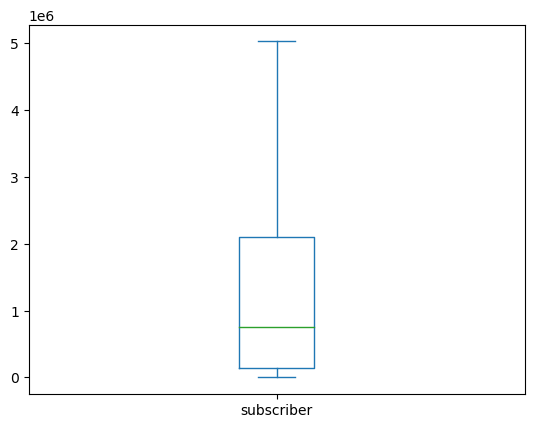

In [139]:
train['subscriber'].plot(kind='box')

Now we can see that there are no outliers in subscriber variable.

In [140]:
train.corr()

,category_id,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views
category_id,1.000000,0.137357,0.010821,0.015124,0.014780,0.010865,0.025747,0.017623,-0.037072
subscriber,0.137357,1.000000,0.031389,-0.010293,0.034597,-0.001608,0.034938,0.036535,-0.005072
Trend_day_count,0.010821,0.031389,1.000000,-0.022530,-0.022577,0.002526,-0.015170,-0.015472,0.014524
Tag_count,0.015124,-0.010293,-0.022530,1.000000,-0.009058,-0.016381,-0.027296,-0.024102,-0.001531
Trend_tag_count,0.014780,0.034597,-0.022577,-0.009058,1.000000,-0.002241,-0.006537,-0.008228,-0.029683
comment_count,0.010865,-0.001608,0.002526,-0.016381,-0.002241,1.000000,0.005050,-0.001416,0.036455
likes,0.025747,0.034938,-0.015170,-0.027296,-0.006537,0.005050,1.000000,0.915572,-0.023523
dislike,0.017623,0.036535,-0.015472,-0.024102,-0.008228,-0.001416,0.915572,1.000000,-0.027810
views,-0.037072,-0.005072,0.014524,-0.001531,-0.029683,0.036455,-0.023523,-0.027810,1.000000


In [152]:
def chi_test(var1,var2):
    tab=pd.crosstab(var1,var2)
    _, p, _, _ = chi2_contingency(tab, correction=False)
    if p<0.05:
        print("Reject the null hypothesis and accept the Alternate Hypothesis",round(p,2))
    else:
        print("Failed to reject the null hypothesis",round(p,2))

Ho: Subscriber count does not impacts the view count

Ha: Subscriber count impacts the view count

In [153]:
chi_test(train['subscriber'],train['views'])

Failed to reject the null hypothesis 0.12


Ho: Trend tag count does not impacts the view count

Ha: trend tag count impacts the view count

In [165]:
chi_test(train['Trend_tag_count'],train['views'])

Failed to reject the null hypothesis 0.46


Ho: description does not impacts the view count

Ha: description impacts the view count

In [166]:
chi_test(train['description'],train['views'])

Failed to reject the null hypothesis 0.18


In [167]:
chi_test(train['dislike'],train['likes'])

Reject the null hypothesis and accept the Alternate Hypothesis 0.0
